# Problem 12.5

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.5**


**The tabulated data provided in the online repository of this book includes hourly irradiance data for the different solar irradiance components measured in Madrid, Spain, on June 10 at a fixed plane at a tilt of 35⁰, which is very close to the optimum inclination (for maximum energy capture throughout the year) at such latitude.**

**(a) For every hour, estimate the diffuse irradiance from the global and direct components and compare them to the experimentally measured diffuse irradiance. Calculate the root-mean-square error (RMSE) between both time series.**

**(b) What are the typical instruments used to obtain such experimental data?**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the measured solar irradiance components.

In [5]:
G = pd.read_csv('data/Global_35deg.csv', index_col=0, header=0) 
B = pd.read_csv('data/Direct_35deg.csv', index_col=0, header=0) 
D = pd.read_csv('data/Diffuse_35deg.csv', index_col=0, header=0) 
B

,Gb(i)
time(UTC+1),
00:00,0.00
01:00,0.00
02:00,0.00
03:00,0.00
04:00,0.00
05:00,0.00
06:00,0.00
07:00,5.90
08:00,131.87


We can estimated the diffuse irradiance $D$ by substracting the direct irradiance $B$ from the global irradiance $G$.

In [6]:
D_estimated = G['G(i)']-B['Gb(i)']
D_estimated

time(UTC+1)
00:00      0.00
01:00      0.00
02:00      0.00
03:00      0.00
04:00      0.00
05:00      0.00
06:00     13.34
07:00     57.23
08:00    106.95
09:00    147.89
10:00    183.18
11:00    206.35
12:00    233.26
13:00    244.38
14:00    244.52
15:00    234.24
16:00    211.69
17:00    172.14
18:00    124.94
19:00     69.31
20:00     24.39
21:00      0.00
22:00      0.00
23:00      0.00
dtype: float64

We can plot the measured and estimated irradiance components. 

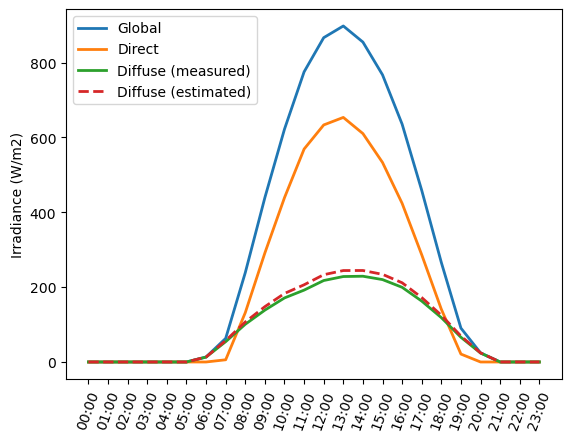

In [8]:
plt.plot(G['G(i)'], 
         linewidth=2, label='Global')
plt.plot(B['Gb(i)'], 
         linewidth=2, label='Direct')
plt.plot(D['Gd(i)'],
         linewidth=2, label='Diffuse (measured)')
plt.plot(D_estimated,
         linewidth=2, linestyle='--',label='Diffuse (estimated)')
plt.ylabel('Irradiance (W/m2)')
plt.xticks(rotation=70)
plt.legend()

We calculate the root-mean square error (RMSE) between the estimated and measured diffuse irradiance. 

In [10]:
RMSE=np.sqrt(((D['Gd(i)']-D_estimated)**2).mean())
print('The RMSE is ' + str(RMSE.round(2)) + ' W/m2')

The RMSE is 8.41 W/m2


**(b) What are the typical instruments used to obtain such experimental data?**

Global irradiance is measured using a pyranometer. Direct irradiance using a pyrheliometer. Diffuse irradiance can be measured using a pyranometer together with an element to block direct irradiance. 